In [11]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import pickle 
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import tkinter as tk
from tkinter import *
from PIL import ImageGrab, Image
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV

### Set-Up:

In [49]:
df = pd.read_csv("C:/Users/UKGC/Python/Data/Supervised Learning Projects/Digit Classification/train.csv")
X = df.drop(labels="label", axis = 1)
y = df["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

### Non-deployed model with no PCA:

Optimal SCV Test Accuracy: 0.981
Optimal SCV Train Accuracy: 1.000


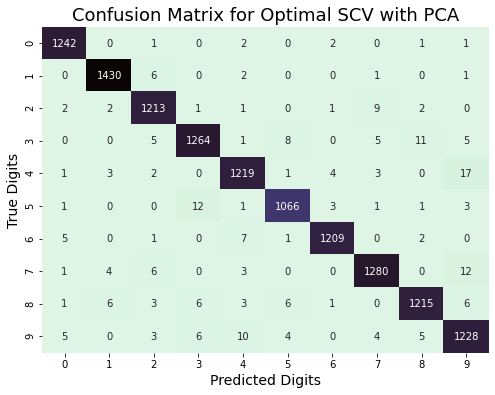

In [13]:
svc_model_best = SVC(C= 2, gamma= 5e-07, kernel= 'rbf').fit(X_train, y_train)
svc_final_predictions = svc_model_best.predict(X_test)

plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, svc_final_predictions),
            annot=True, fmt='g', cmap="mako_r", cbar=False)

_=plt.xlabel("Predicted Digits", fontsize=14)
_=plt.ylabel("True Digits", fontsize=14)
_=plt.title("Confusion Matrix for Optimal SCV with PCA", fontsize=18)
print("Optimal SCV Test Accuracy: {:0.3f}".format(svc_model_best.score(X_test,y_test)))
print("Optimal SCV Train Accuracy: {:0.3f}".format(svc_model_best.score(X_train,y_train)))

In [14]:
cross_val_score_SVC_best = cross_val_score(svc_model_best, X, y, cv=5, n_jobs=5)
print(cross_val_score_SVC_best, cross_val_score_SVC_best.mean())

[0.98214286 0.98392857 0.9802381  0.9825     0.98142857] 0.9820476190476191


In [114]:
filename = "Classifier_Model_NOPCA.sav"
pickle.dump(svc_model_best, open(filename, "wb"))

### Non-deployed Model prediction from GUI Image:

In [94]:
image_resize = Image.open("digit.png").show()

In [95]:
image_matrix = np.array(Image.open("digit.png"))

In [96]:
for idx, i in enumerate(image_matrix):
    for jdx, j in enumerate(i):
        image_matrix[idx][jdx] = abs(j-255)

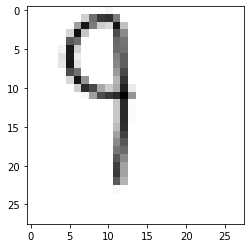

In [97]:
plt.imshow(image_matrix, cmap=plt.cm.gray_r, interpolation='nearest')

In [98]:
prediction = svc_model_best.predict(image_matrix.reshape(1,784))[0]
print(prediction)

5


#### Image from test data:

9


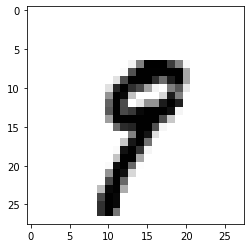

In [109]:
i = 11
plt.imshow(X_test.iloc[i].values[:].reshape(28,28), cmap=plt.cm.gray_r, interpolation='nearest')
print(svc_final_predictions[i])

In [110]:
prediction = svc_model_best.predict(X_test.iloc[i].values[:].reshape(1,784))[0]
print(prediction)

9


### Deployed Model (with PCA):

In [75]:
df = pd.read_csv("C:/Users/UKGC/Python/Data/Supervised Learning Projects/Digit Classification/train.csv")
X = df.drop(labels="label", axis = 1)
y = df["label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)
load_model = pickle.load(open("Classifier_Model.sav", "rb"))

pca = PCA(n_components=100).fit(X_train)

In [111]:
X_test_pca = pca.transform(X_test)

X_test_ = pca.transform(image_matrix.reshape(1,784))
prediction = load_model.predict(X_test_)[0]
print(prediction)

5
